In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as scp

# Задание 5_2


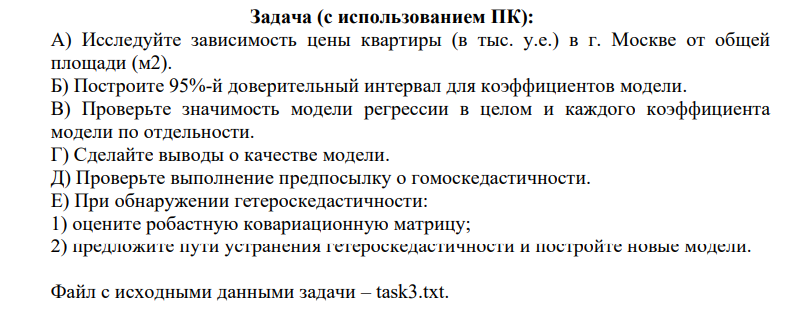

In [ ]:
data = pd.read_csv('/content/task3.txt', sep = '\t')
x = data['Square']
y = data['Price']
data.head()

,Price,Square
0,5876,503
1,5743,256
2,5355,263
3,5202,484
4,5099,144


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


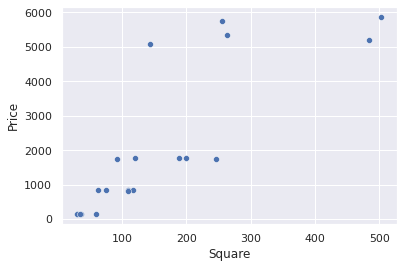

In [ ]:
sns.set()
sns.scatterplot(x, y)

А) Исследуйте зависимость цены квартиры (в тыс. у.е.) в г. Москве от общей
площади (м2). 

In [ ]:
import statsmodels.api as sm
results = sm.OLS.from_formula("Price ~ Square", data = data).fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     38.08
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           7.96e-06
Time:                        11:51:26   Log-Likelihood:                -169.58
No. Observations:                  20   AIC:                             343.2
Df Residuals:                      18   BIC:                             345.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.2723    425.487      0.097      0.9

Считаем остатки

In [ ]:
reg = LinearRegression().fit(x.values.reshape(-1,1), y.values.reshape(-1,1))

In [ ]:
epsilons = y.values.reshape(-1,1) - reg.predict(x.values.reshape(-1, 1))

array([-3.41060513e-13])

In [ ]:
mean_e = epsilons.mean()
std_e = epsilons.std()

vec_w = (-1) * (epsilons - mean_e) / std_e
vec_w[:5]

array([[ 0.46819726],
       [-2.10741597],
       [-1.69806892],
       [ 0.83995307],
       [-2.7741756 ]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


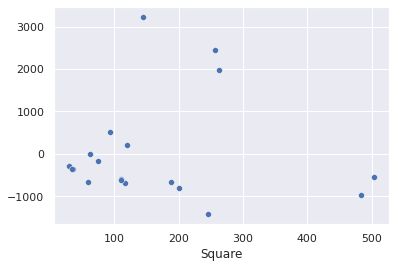

In [ ]:
sns.set()
sns.scatterplot(x, epsilons.reshape(1, -1)[0])

# тест ранговой корреляции Спирмена

In [ ]:
rho, p = scp.spearmanr(x, abs(epsilons))

rho, p

(0.6759503677838935, 0.0010695333928390479)

# тест Глейзера

In [ ]:
result = [0, 1, 2, 3, 4, 5]
data_1 = data
data_1.columns = ['y', 'x']
model = ['x', 'np.sqrt(x)', 'np.abs(1/x)', 'np.abs(1 / np.sqrt(x))', 'np.sqrt(x ** 3)']

result[1] = sm.OLS.from_formula("np.abs(epsilons) ~ x", data = data_1).fit().tvalues['x']
result[2] = sm.OLS.from_formula("np.abs(epsilons) ~ np.sqrt(x)", data = data_1).fit().tvalues['np.sqrt(x)']
result[3] = sm.OLS.from_formula("np.abs(epsilons) ~ np.abs(1/x)", data = data_1).fit().tvalues['np.abs(1 / x)']
result[4] = sm.OLS.from_formula("np.abs(epsilons) ~ np.abs(1 / np.sqrt(x))", data = data_1).fit().tvalues['np.abs(1 / np.sqrt(x))']
result[5] = sm.OLS.from_formula("np.abs(epsilons) ~ np.sqrt(x ** 3)", data = data_1).fit().tvalues['np.sqrt(x ** 3)']

for i in range(5):
  print(f'Model {model[i]} t-stats : {np.abs(result[i + 1])}')
print(scp.t.isf(0.05 / 2, 18))

Model x t-stats : 2.2366585900303493
Model np.sqrt(x) t-stats : 2.370204403323419
Model np.abs(1/x) t-stats : 1.5014660685170058
Model np.abs(1 / np.sqrt(x)) t-stats : 1.9661652840584585
Model np.sqrt(x ** 3) t-stats : 2.03966855587151
2.10092204024096


Из этого критерия следует, что гипотеза H0 отвергается, и остатки гетероскедастичны

In [ ]:
print(results.get_robustcov_results(cov_type = "HC0").summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.661     
Dependent Variable: Price            AIC:                343.1681  
Date:               2022-11-26 13:49 BIC:                345.1596  
No. Observations:   20               Log-Likelihood:     -169.58   
Df Model:           1                F-statistic:        75.41     
Df Residuals:       18               Prob (F-statistic): 7.47e-08  
R-squared:          0.679            Scale:              1.5074e+06
--------------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|     [0.025    0.975] 
--------------------------------------------------------------------
Intercept     41.2723  251.0755  0.1644  0.8713  -486.2176  568.7623
Square        12.6840    1.4606  8.6841  0.0000     9.6154   15.7526
-------------------------------------------------------------------
Omnibus:              12.728        Durbin-Watson:           

# Метод Доступных Взвешенных Наименьших Квадратов

In [ ]:
data_2 = data_1
data_2['x'] = 1 / data_2['x']
data_2['y'] = data_2['y'] * data_2['x']

fin_model = sm.OLS.from_formula("y ~ x", data = data_2)
result_dmnk = fin_model.fit()

In [ ]:
sum_dm = result_dmnk.summary()
print(sum_dm)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     5.709
Date:                Sat, 26 Nov 2022   Prob (F-statistic):             0.0280
Time:                        13:15:17   Log-Likelihood:                -66.700
No. Observations:                  20   AIC:                             137.4
Df Residuals:                      18   BIC:                             139.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.9805      2.539      6.293      0.0

In [ ]:
y_pred = fin_model.predict(fin_model.fit().model.exog.reshape(2, 20))
y_pred

array([[5.0400e+02, 5.5833e+04, 5.0400e+02, 3.1945e+04, 5.0400e+02,
        5.9114e+04, 5.0400e+02, 3.8209e+04, 5.0400e+02, 5.5474e+04,
        5.0400e+02, 1.5290e+04, 5.0400e+02, 1.8228e+04, 5.0400e+02,
        1.5278e+04, 5.0400e+02, 1.7698e+04, 5.0400e+02, 3.0426e+04],
       [2.5700e+02, 2.8663e+04, 2.5700e+02, 1.6384e+04, 2.5700e+02,
        3.0215e+04, 2.5700e+02, 1.9684e+04, 2.5700e+02, 2.8304e+04,
        2.5700e+02, 7.8800e+03, 2.5700e+02, 9.3360e+03, 2.5700e+02,
        7.8680e+03, 2.5700e+02, 9.0530e+03, 2.5700e+02, 1.5606e+04],
       [2.6400e+02, 2.9433e+04, 2.6400e+02, 1.6825e+04, 2.6400e+02,
        3.1034e+04, 2.6400e+02, 2.0209e+04, 2.6400e+02, 2.9074e+04,
        2.6400e+02, 8.0900e+03, 2.6400e+02, 9.5880e+03, 2.6400e+02,
        8.0780e+03, 2.6400e+02, 9.2980e+03, 2.6400e+02, 1.6026e+04],
       [4.8500e+02, 5.3743e+04, 4.8500e+02, 3.0748e+04, 4.8500e+02,
        5.6891e+04, 4.8500e+02, 3.6784e+04, 4.8500e+02, 5.3384e+04,
        4.8500e+02, 1.4720e+04, 4.8500e+02, 1

#### 95% доверительный интервал :
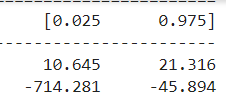


In [ ]:
scp.f.ppf(q = 1 - 0.05, dfn = 1, dfd = len(data_2) - 2)

4.413873419170566

##Значимость параметров регресии:

b0 => p-value < 0.05, следовательно гипотеза H0 отвергается и параметр значим

b1 => p-value < 0.05, следовательно гипотеза H0 отвергается и параметр значим

##Значимость модели регрессии:
F-stat = 5.709 > F-table = 4.413, следовательно гипотеза H0 отвергается и модель значима

#Качество модели
R^2 = 0.241

R^2(adj) = 0.199

Качество модели плохое - значение R^2 меньше 0.5, кроме того есть значительное различие между скорректированным коэффициентом и обычным из-за малого количества наблюдений

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


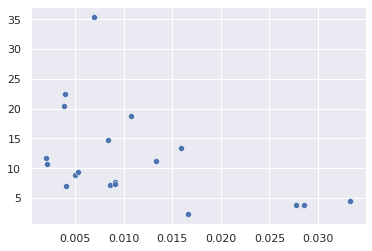

In [ ]:
sns.set()
sns.scatterplot(data_2['x'].values, data_2['y'].values)

После преобразования нет нормального распределения

#Тест Уайта

In [ ]:
from statsmodels.stats.diagnostic import het_white

#perform White's test
white_test = het_white(fin_model.fit().resid, fin_model.fit().model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test))['Test Statistic p-value'])

0.08498413502113245


p-value = 0.085 > 0.05 следовательно гипотеза H0 принимается и модель показывает гомоскедастичность

После применения ДМНК качество и адекватность модели значительно понизилась, что свидетельствует о неадекватности метода решения. При этом метод робустной ковариационной матрицы, не уменьшает качество модели. Стоит выбрать его.

#Задание 6_2

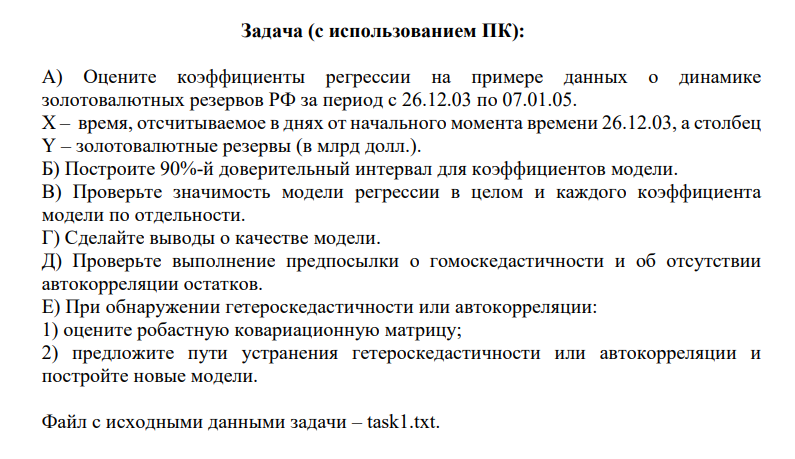

#«Автокорреляция»

In [ ]:
data = pd.read_csv('/content/task1.txt', sep = '\t', decimal = ',')
data.head()

,X,Y
0,7,77.1
1,14,78.9
2,21,79.1
3,28,82.7
4,35,84.1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


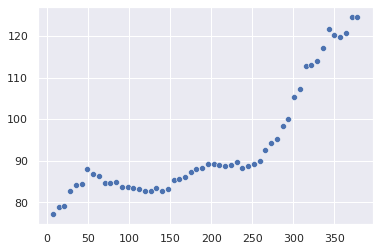

In [ ]:
sns.set()
sns.scatterplot(data['X'].values, data['Y'].values)

In [ ]:
results = sm.OLS.from_formula("Y ~ X", data = data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     155.6
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           2.96e-17
Time:                        14:03:49   Log-Likelihood:                -179.59
No. Observations:                  54   AIC:                             363.2
Df Residuals:                      52   BIC:                             367.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.8507      1.893     38.483      0.0

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

In [ ]:
#Тест Голфреда-Кванта
from statsmodels.stats import api
new_x = np.concatenate((np.ones((len(data['y']), 1)), x.values.reshape(-1, 1)), axis = 1)

api.het_goldfeldquandt(epsilons, new_x)

(0.016108527948533475, 0.9999978722994026, 'increasing')

In [ ]:
vec_w = sorted(vec_w)

In [ ]:
import scipy.stats as scp

new_w = [round(scp.norm.cdf(vec_w[i])[0], 3) for i in range(len(vec_w))]
new_w

[0.072,
 0.127,
 0.129,
 0.156,
 0.185,
 0.21,
 0.213,
 0.246,
 0.247,
 0.351,
 0.353,
 0.38,
 0.389,
 0.416,
 0.561,
 0.588,
 0.693,
 0.783,
 0.816,
 0.865,
 0.878,
 0.897,
 0.937,
 0.995]

In [ ]:
i = np.linspace(0., 1., len(new_w))
k = 0

In [ ]:
for cur in range(len(new_w) - 1):
  k += (((new_w[cur] > i[cur]) & (new_w[cur] < i[cur + 1])) == 0)

k, len(new_w)

(17, 24)